## Bike Sharing Case Study

### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

Essentially the company wants :

- To understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19, by creating a linear model.
- To identify the variables affecting their revenues i.e. Which variables are significant in predicting the demand for shared bikes.
- To know the accuracy of the model, i.e. How well those variables describe the bike demands
- They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits

### Reading and Understanding the data

#### Reading the Bike sharing dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
bike_df = pd.read_csv("day.csv")
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Step 1 : Analysing the dataset

In [3]:
bike_df.shape

(730, 16)

In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### <span style="color: red;">Inferences :</span>
In the Bike Prediction dataset there are a total of 730 rows and 16 columns in which we need to use the 'CNT' column for the prediction purposes.

#### Checking Missing Values:

In [6]:
# percentage of missing values in each column
round(100*(bike_df.isnull().sum()/len(bike_df)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [7]:
# percentage of missing values in each row
round(100*(bike_df.isnull().sum(axis=1)/len(bike_df)), 2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

#### <span style="color: red;">Inferences :</span>
No missing/NULL values found

In [8]:
# Checking for duplicate values

bike_dup = bike_df.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(730, 16)

In [9]:
bike_df.shape

(730, 16)

#### <span style="color: red;">Inferences :</span>
Duplicate values are not present

In [10]:
#Checking the number of unique values
bike_df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

##### Data Cleaning 

#### Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

- instant : This is a index column, we have a default index for the same purpose

- dteday : This column has date. Since, we already have separate year and month column, we can carry out our analysis without this column.

- casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two column.

- We will save the new dataframe as bike_df1, so that the original dataset is preserved for any future analysis/validation

In [11]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Here the column "weekday" seems incorrect. For example 01-01-2018 corresponds to first day 
of the week, however for the same date in the weekday column it has a value of "6". It is
better to drop this column and extract the weekday as a seperate column from "dteday"


In [12]:
bike_df['dteday']= pd.to_datetime(bike_df['dteday'], format='%d-%m-%Y')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
bike_df['weekday_new'] = bike_df['dteday'].dt.dayofweek
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday_new
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [14]:
#existing column of "weekday" is dropped from dataset
bike_df=bike_df.drop('weekday',axis=1)
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday_new
0,1,2018-01-01,1,0,1,0,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,2018-01-02,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,2018-01-03,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,2018-01-04,1,0,1,0,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,2018-01-05,1,0,1,0,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [15]:
bike_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

### Step 2 : Preparing the data for modelling 

#### Converting "season" and 'weathersit' into categorical variables 

In [16]:
# Mapping seasons
season_mapping = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}

In [17]:
bike_df.season = bike_df.season.map(season_mapping)

In [18]:
# Mapping Weathersit
weathersit_mapping = {1:"clear_partlycloudy",2:'Mist + Cloudy',3:'Light Snow+Thunderstorm',4:'Heavy Rain + Ice Pallets'}

In [19]:

bike_df.weathersit=bike_df.weathersit.map(weathersit_mapping)

In [20]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday_new
0,1,2018-01-01,Spring,0,1,0,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,2018-01-02,Spring,0,1,0,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,2018-01-03,Spring,0,1,0,1,clear_partlycloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,2018-01-04,Spring,0,1,0,1,clear_partlycloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,2018-01-05,Spring,0,1,0,1,clear_partlycloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [21]:
#The index column is dropped
bike_df1=bike_df.drop('instant',axis=1)
bike_df1

,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday_new
0,2018-01-01,Spring,0,1,0,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2018-01-02,Spring,0,1,0,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,2018-01-03,Spring,0,1,0,1,clear_partlycloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,2018-01-04,Spring,0,1,0,1,clear_partlycloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,2018-01-05,Spring,0,1,0,1,clear_partlycloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,Spring,1,12,0,1,Mist + Cloudy,10.420847,11.33210,65.2917,23.458911,247,1867,2114,4
726,2019-12-28,Spring,1,12,0,1,Mist + Cloudy,10.386653,12.75230,59.0000,10.416557,644,2451,3095,5
727,2019-12-29,Spring,1,12,0,0,Mist + Cloudy,10.386653,12.12000,75.2917,8.333661,159,1182,1341,6
728,2019-12-30,Spring,1,12,0,0,clear_partlycloudy,10.489153,11.58500,48.3333,23.500518,364,1432,1796,0


In [22]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      730 non-null    int64         
 1   dteday       730 non-null    datetime64[ns]
 2   season       730 non-null    object        
 3   yr           730 non-null    int64         
 4   mnth         730 non-null    int64         
 5   holiday      730 non-null    int64         
 6   workingday   730 non-null    int64         
 7   weathersit   730 non-null    object        
 8   temp         730 non-null    float64       
 9   atemp        730 non-null    float64       
 10  hum          730 non-null    float64       
 11  windspeed    730 non-null    float64       
 12  casual       730 non-null    int64         
 13  registered   730 non-null    int64         
 14  cnt          730 non-null    int64         
 15  weekday_new  730 non-null    int64         
dtypes: datet

### Step 3 : Visualising the data
- We would be able to check if all the variables are linearly related or not (important if we want to proceed with a linear model)
  Checking if there are any multicollinearity that exist
- Here where we can also identify if some predictors directly have a strong association(correlation) with the outcome variable

#### Visualising Numeric Variables : Using Pairplot

In [23]:
bike_df1.corr()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,weekday_new
yr,1.000000e+00,-5.162656e-16,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728,0.000684
mnth,-5.162656e-16,1.000000e+00,0.018905,-0.004688,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191,0.006080
holiday,8.195345e-03,1.890483e-02,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764,-0.048541
workingday,-2.945396e-03,-4.687953e-03,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542,0.464121
temp,4.878919e-02,2.190833e-01,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044,0.029929
atemp,4.721519e-02,2.264302e-01,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685,0.023235
hum,-1.125471e-01,2.249368e-01,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543,-0.034223
windspeed,-1.162435e-02,-2.080131e-01,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132,-0.011361
casual,2.505017e-01,1.212079e-01,0.054055,-0.517607,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123,-0.120906
registered,5.969106e-01,2.919516e-01,-0.109142,0.305437,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411,0.148473


#### <span style="color: red;">Insights : </span>
There is a positive correlation between the target variable "cnt" with 'temp', 'atemp','casual' and 'registered, based on the above shown correlation values. The target variable "cnt" is a sum of "registered" and "casual" and hence we observe high collinearity among them. Target variable "cnt" has a negative correlation with "windspeed".
Data visualization can be helpful for better understanding

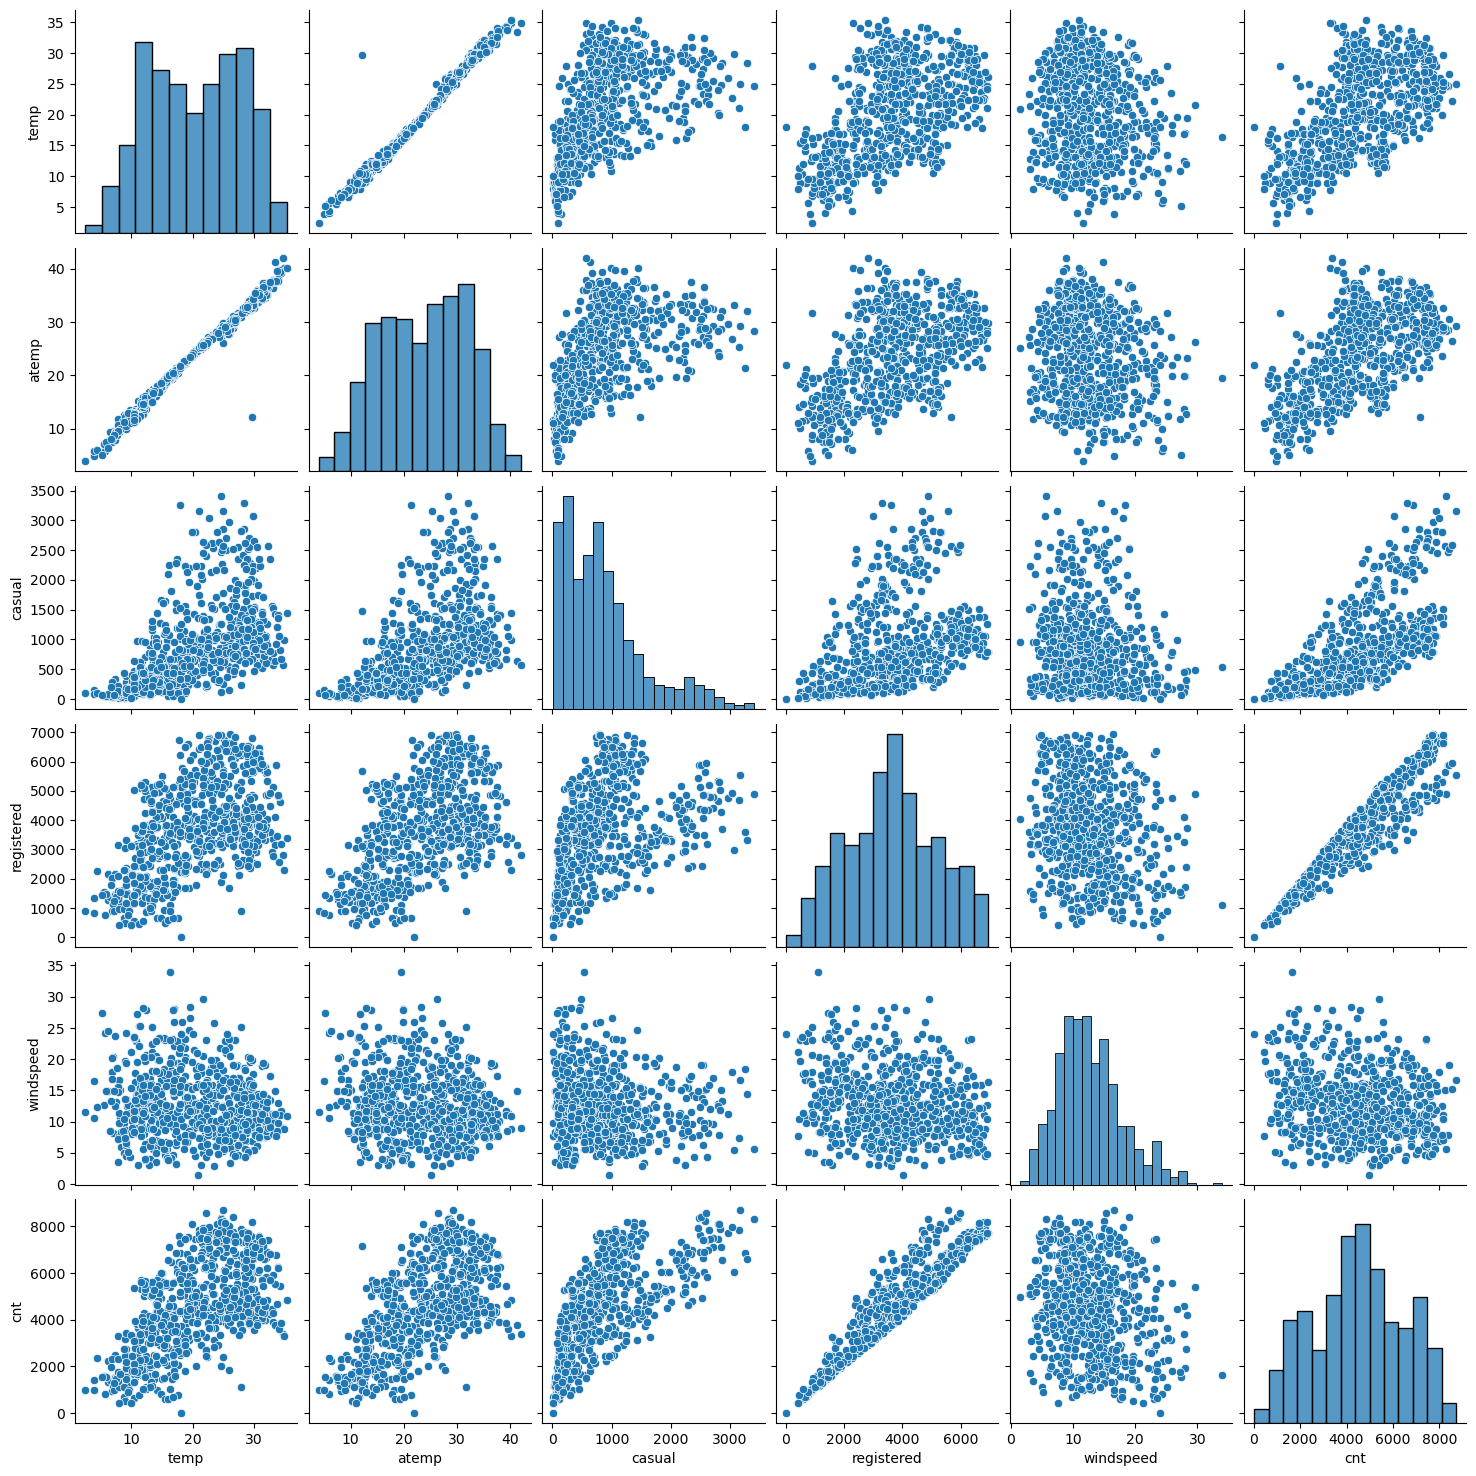

In [24]:
sns.pairplot(data=bike_df1, vars=['temp','atemp','casual','registered','windspeed','cnt'])
plt.show()

In [25]:
bike_df1=bike_df1.drop(['casual','registered','dteday'],axis=1)

In [26]:
bike_df1.columns

Index(['season', 'yr', 'mnth', 'holiday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt', 'weekday_new'],
      dtype='object')

#### <span style="color: red;">Insights : </span>
target variable 'cnt'is a sum of casual and registered users, hence it makes sense to remove these variables


#### Visualising Categorical Variables : Using a boxplot

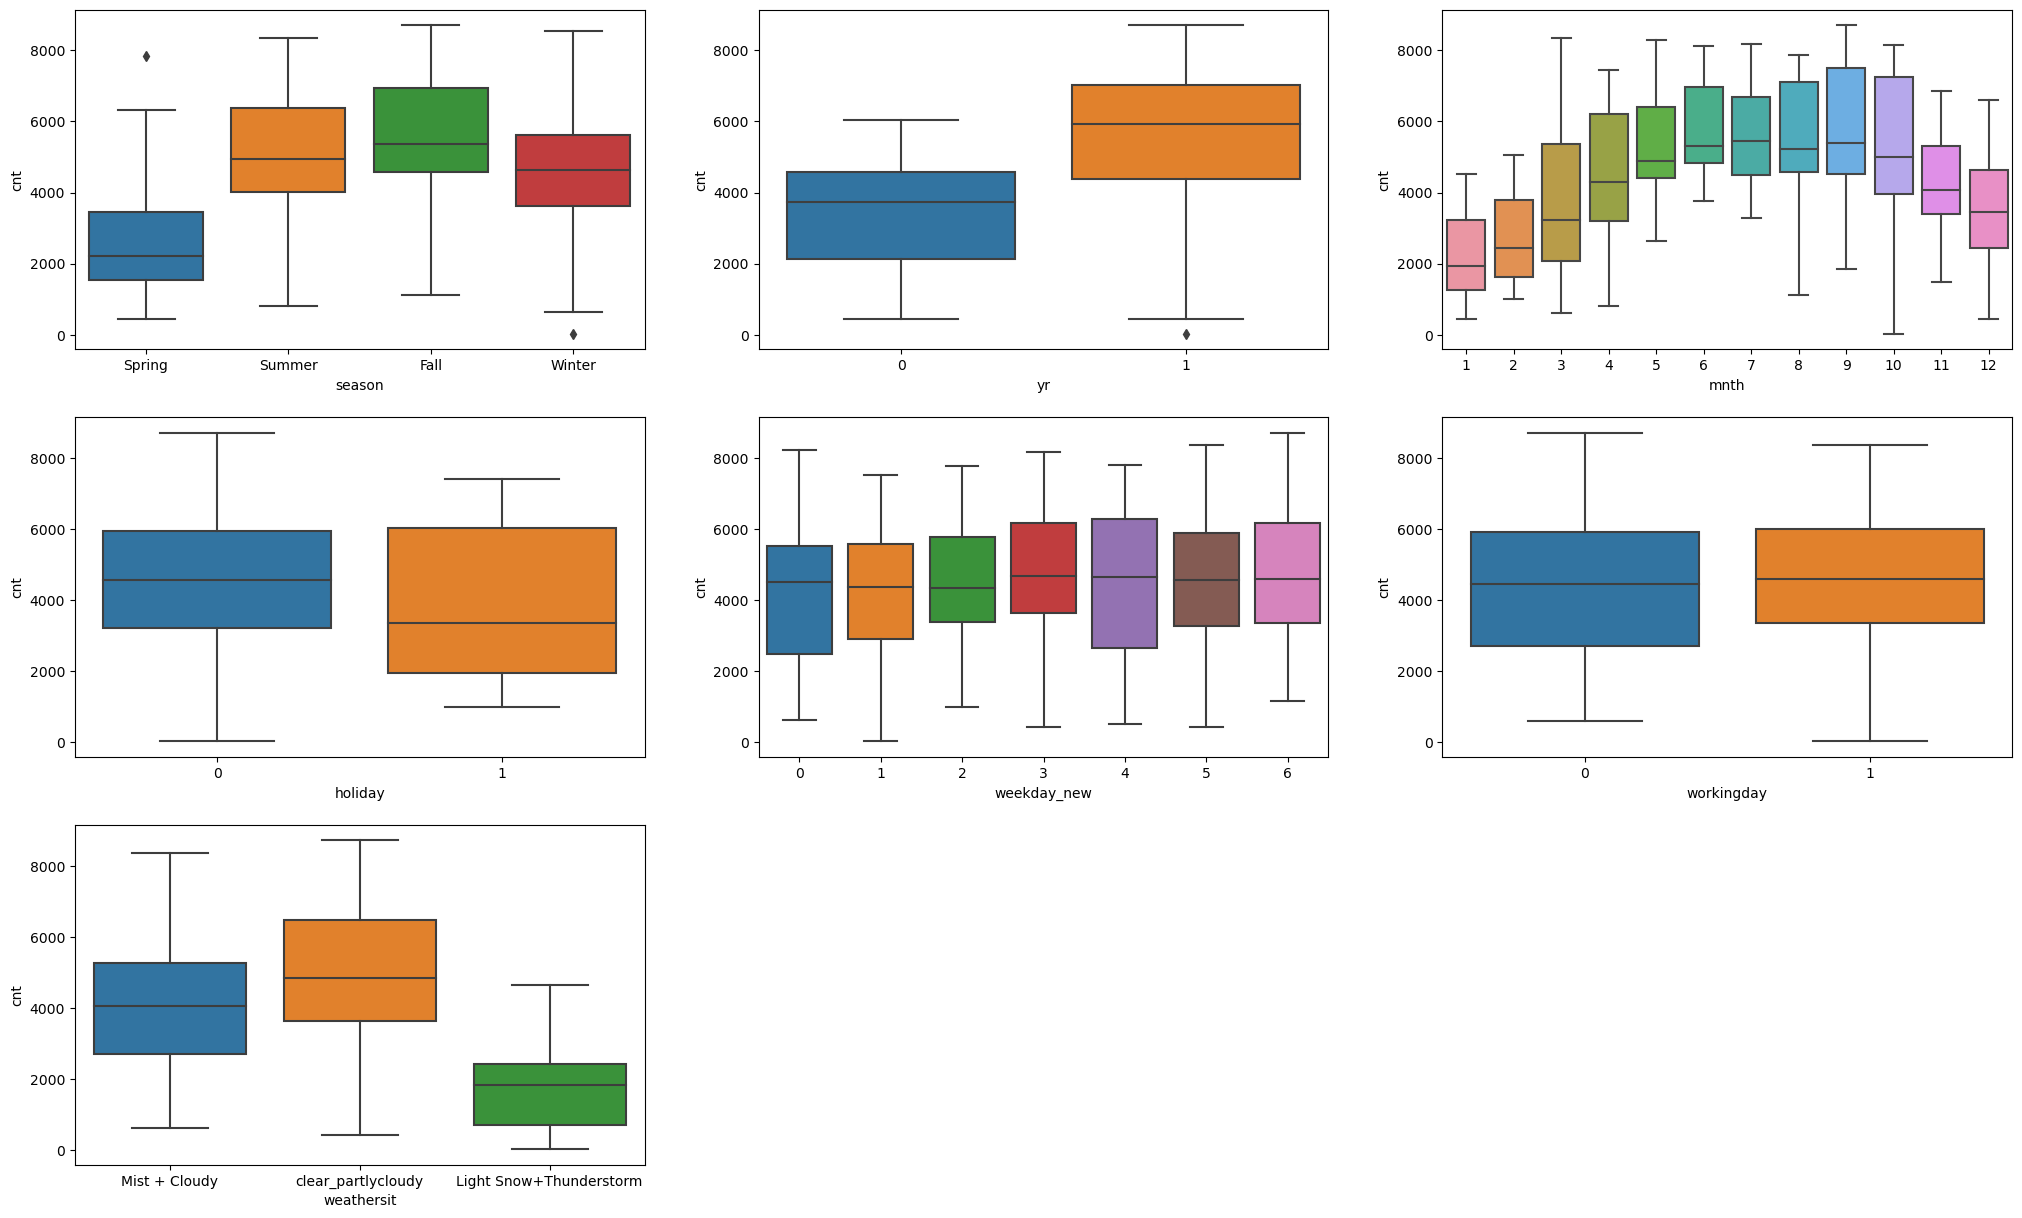

In [27]:
plt.figure(figsize=(25,15))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=bike_df1)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=bike_df1)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=bike_df1)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=bike_df1)
plt.subplot(3,3,5)
sns.boxplot(x='weekday_new',y='cnt',data=bike_df1)
plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=bike_df1)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=bike_df1)
plt.show()

#### <span style="color: red;">Insights : </span>
- The graph clearly shows the qualitative distributions of the data, now if the model suggests the important predictors, using these graphs we can be more confident about the predictions of the model.
- For the variable season, we can clearly see that the category 3 : Fall, has the highest median, which shows that the demand was high during this season. It is least for 1: spring.
- The year 2019 had a higher count of users as compared to the year 2018.
- The count of rentals is almost even throughout the week.
- There are no users when there is heavy rain/ snow indicating that this weather is quite adverse. Highest count was seen when the weather situation was Clear, Partly Cloudy.
- The number of rentals peaked in September, whereas it is less in December. This observation is consistent with the observations made regarding the weather. As a result of the typical substantial snowfall in December, rentals may have declined.
- Higher no.of users are present on a holiday/weekend. It is assumed that "0" indicates holiday/weekend
- Working day or a weekday do not have any significant impact on the no.of users as there is not much change in the median values
- From the "Workingday" boxplot we can see those maximum bookings happening between 4000 and 6000, that is the median count of users is constant almost throughout the week. There is not much of difference in booking whether its working day or no

In [28]:
seasons = pd.get_dummies(bike_df1['season'], drop_first = True)
seasons

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [29]:
bike_df2 = pd.concat([bike_df1, seasons], axis = 1)

In [30]:
bike_df2.drop('season',axis = 1, inplace = True)
bike_df2.head()

,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weekday_new,Spring,Summer,Winter
0,0,1,0,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0
1,0,1,0,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,1,0,0
2,0,1,0,1,clear_partlycloudy,8.050924,9.47025,43.7273,16.636703,1349,2,1,0,0
3,0,1,0,1,clear_partlycloudy,8.200000,10.60610,59.0435,10.739832,1562,3,1,0,0
4,0,1,0,1,clear_partlycloudy,9.305237,11.46350,43.6957,12.522300,1600,4,1,0,0


In [31]:
weathersit_dummy = pd.get_dummies(bike_df2['weathersit'], drop_first = True)
weathersit_dummy

,Mist + Cloudy,clear_partlycloudy
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
725,1,0
726,1,0
727,1,0
728,0,1


In [32]:
bike_df2 = pd.concat([bike_df2, weathersit_dummy], axis = 1)
bike_df2

,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weekday_new,Spring,Summer,Winter,Mist + Cloudy,clear_partlycloudy
0,0,1,0,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0,1,0
1,0,1,0,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,1,0,0,1,0
2,0,1,0,1,clear_partlycloudy,8.050924,9.47025,43.7273,16.636703,1349,2,1,0,0,0,1
3,0,1,0,1,clear_partlycloudy,8.200000,10.60610,59.0435,10.739832,1562,3,1,0,0,0,1
4,0,1,0,1,clear_partlycloudy,9.305237,11.46350,43.6957,12.522300,1600,4,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,12,0,1,Mist + Cloudy,10.420847,11.33210,65.2917,23.458911,2114,4,1,0,0,1,0
726,1,12,0,1,Mist + Cloudy,10.386653,12.75230,59.0000,10.416557,3095,5,1,0,0,1,0
727,1,12,0,0,Mist + Cloudy,10.386653,12.12000,75.2917,8.333661,1341,6,1,0,0,1,0
728,1,12,0,0,clear_partlycloudy,10.489153,11.58500,48.3333,23.500518,1796,0,1,0,0,0,1


In [33]:
bike_df2.drop('weathersit', axis = 1, inplace = True)
bike_df2.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,weekday_new,Spring,Summer,Winter,Mist + Cloudy,clear_partlycloudy
0,0,1,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0,1,0
1,0,1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,1,0,0,1,0
2,0,1,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,0,0,0,1
3,0,1,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,0,0,0,1
4,0,1,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,0,0,0,1


### Step 4: Splitting the Data into Training and Testing Sets 
The first basic step for regression is performing a train-test split.

In [34]:
df_train, df_test = train_test_split(bike_df2, train_size = 0.7, random_state = 100)

In [35]:
print(df_train.shape)

(510, 15)


In [36]:
print(df_test.shape)

(220, 15)


### Step 5: Rescaling the Features
- Although scaling doesn't impact the linear model in the case of simple linear regression, however while performing multiplwe linear regression it might impact the model. As we can see that the value of the feature cnt has much higher values as compared to the other features like temp, atemp etc. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. There are two common ways of rescaling:

 - Min-Max scaling
 - Standardisation (mean-0, sigma-1)
 
 This time, we will use MinMax scaling.

In [37]:
scaler = MinMaxScaler()

In [38]:
# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['mnth','weekday_new','temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [39]:
df_train.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,weekday_new,Spring,Summer,Winter,Mist + Cloudy,clear_partlycloudy
576,1,0.545455,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0.333333,0,0,0,0,1
426,1,0.181818,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1.000000,1,0,0,1,0
728,1,1.000000,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0.000000,1,0,0,0,1
482,1,0.272727,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1.000000,0,1,0,1,0
111,0,0.272727,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1.000000,0,1,0,1,0


In [40]:
df_train.describe()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,weekday_new,Spring,Summer,Winter,Mist + Cloudy,clear_partlycloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.503743,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.485294,0.243137,0.247059,0.247059,0.345098,0.625490
std,0.500429,0.315038,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.335050,0.429398,0.431725,0.431725,0.475867,0.484471
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.818182,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.833333,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Checking the coefficients to see which variables are highly correlated

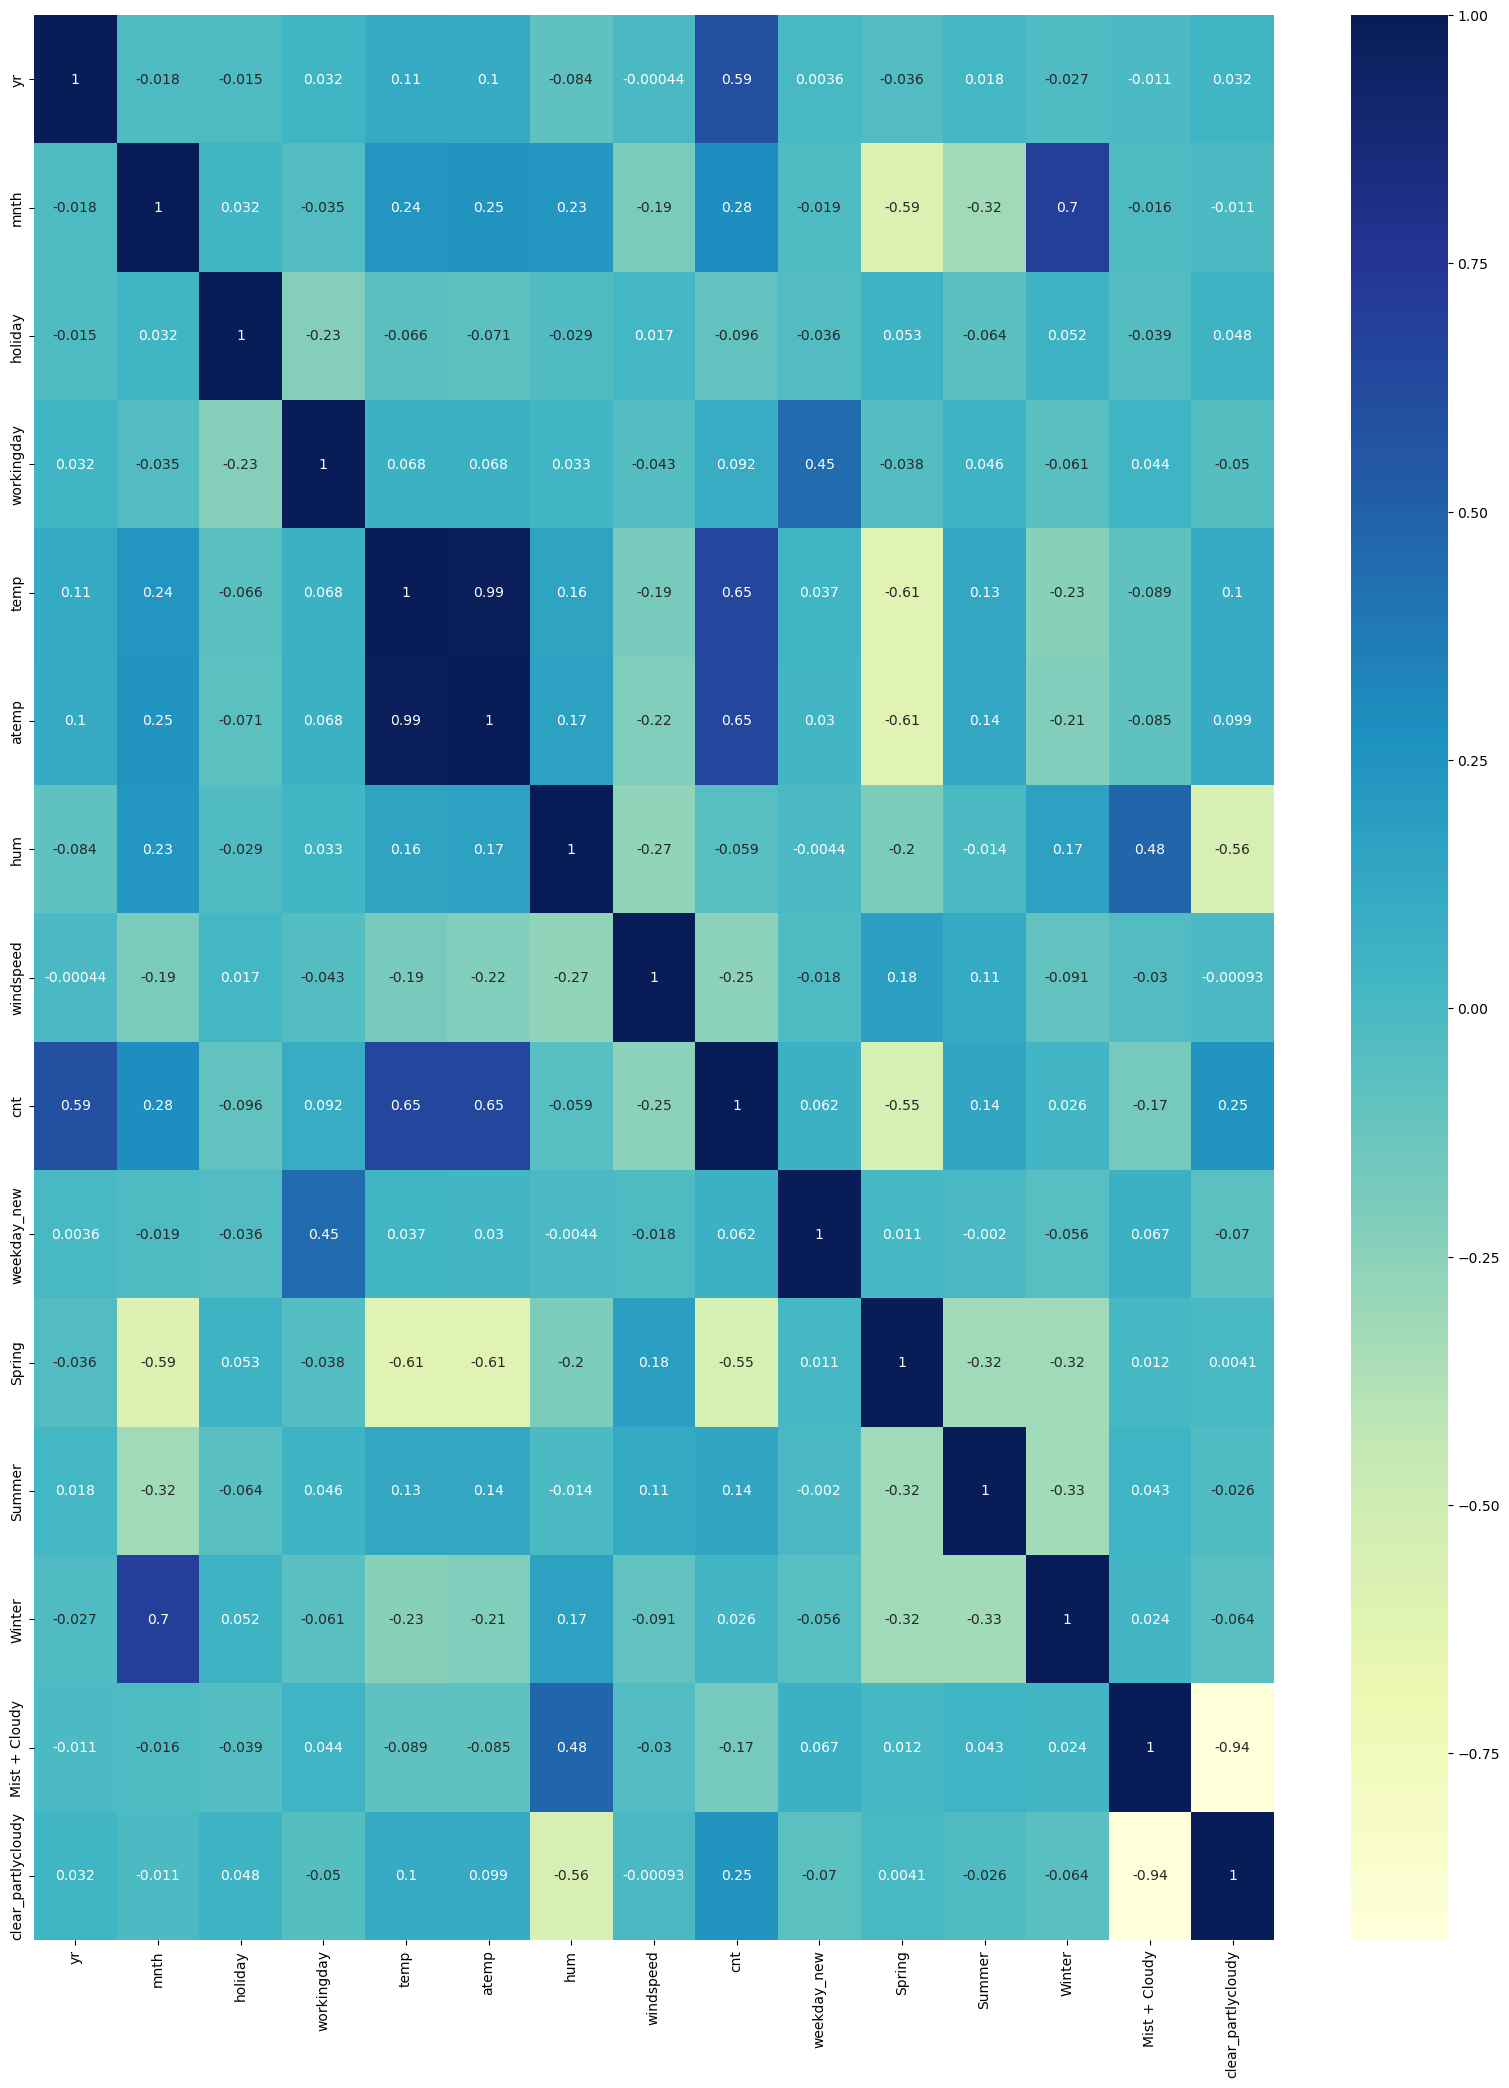

In [41]:
plt.figure(figsize=(20,25))
sns.heatmap(df_train.corr(), cmap = "YlGnBu", annot = True)
plt.show()

### <span style="color: red;">Inference : </span>
As can be seen from the map, atemp and temp seems to be correlated to the target variable cnt. Since, not much can be stated about the other independent variables , hence we will build a model using all the columns.

#### Dividing into X and Y sets for the model building

In [42]:
y_train = df_train.pop('cnt')
X_train = df_train

In [43]:
y_train.shape

(510,)

In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yr                  510 non-null    int64  
 1   mnth                510 non-null    float64
 2   holiday             510 non-null    int64  
 3   workingday          510 non-null    int64  
 4   temp                510 non-null    float64
 5   atemp               510 non-null    float64
 6   hum                 510 non-null    float64
 7   windspeed           510 non-null    float64
 8   weekday_new         510 non-null    float64
 9   Spring              510 non-null    uint8  
 10  Summer              510 non-null    uint8  
 11  Winter              510 non-null    uint8  
 12  Mist + Cloudy       510 non-null    uint8  
 13  clear_partlycloudy  510 non-null    uint8  
dtypes: float64(6), int64(3), uint8(5)
memory usage: 42.3 KB


#### Step 6: Building a linear model
APPROACH USED :

We will use a mixed approach to build the model.
Here we are using `RFE` approach for feature selection and then we will use the `statsmodel` approach for building the model

### Step 6 : Feature Selection


In [45]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator = lm, n_features_to_select = 10)
rfe = rfe.fit(X_train,y_train)

In [46]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 4),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weekday_new', False, 3),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Mist + Cloudy', True, 1),
 ('clear_partlycloudy', True, 1)]

In [47]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Summer',
       'Winter', 'Mist + Cloudy', 'clear_partlycloudy'],
      dtype='object')

In [48]:
X_train.columns[~rfe.support_]

Index(['mnth', 'workingday', 'atemp', 'weekday_new'], dtype='object')

#### Building a model using Statsmodel for detailed statistics

In [49]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

#### Adding constant variable using statsmodel
For statsmodels, we need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [50]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)

In [51]:
X_train_rfe_sm.head()

,const,yr,holiday,temp,hum,windspeed,Spring,Summer,Winter,Mist + Cloudy,clear_partlycloudy
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,1
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,1,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,0,1
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,1,0
111,1.0,0,0,0.345824,0.751824,0.380981,0,1,0,1,0


#### Building the first linear model using statsmodel

In [52]:
lm_1 = sm.OLS(y_train , X_train_rfe_sm).fit()

In [53]:
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     238.2
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          8.27e-183
Time:                        01:45:32   Log-Likelihood:                 485.99
No. Observations:                 510   AIC:                            -950.0
Df Residuals:                     499   BIC:                            -903.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0536      0.049      1.099      0.273      -0.042       0.149
yr                     0.2307      0.008     27.176      0.000       0.214       0.247
holiday               -0.0860      0.027     -3.224      0.001      -0.138      -0.034
temp                   0.4960      0.035     14.316      0.000       0.428       0.564
hum                   -0.1406      0.039     -3.590      0.000      -0.218      -0.064
windspeed             -0.1830      0.027     -6.802      0.000      -0.236      -0.130
Spring                -0.0749      0.021     -3.606      0.000      -0.116      -0.034
Summer                 0.0432      0.014      3.101      0.002       0.016       0.071
Winter                 0.0871      0.017      5.110      0.000       0.054       0.121
Mist + Cloudy          0.1874      0.026      7.176      0.000       0.136       0.239
clear_partlycloudy     0.2396      0.028      8.701      0.000       0.185       0.294
==============================================================================
Omnibus:                       63.872   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.401
Skew:                          -0.644   Prob(JB):                     2.43e-35
Kurtosis:                       5.417   Cond. No.                         25.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### <span style="color: red;">Inference : </span>
Here we observed all the p-values for all the variables is < 0.50. Hence we keep all the columns and check VIF

#### Checking VIF for multicollinearity 

In [54]:
# Calculating the VIFs for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values,i), 2) for i in range (X_train_rfe.shape[1])]
vif.sort_values(by = 'VIF', ascending = False)

,Features,VIF
3,hum,23.68
2,temp,20.15
9,clear_partlycloudy,13.97
8,Mist + Cloudy,8.69
5,Spring,5.02
4,windspeed,4.60
7,Winter,3.62
6,Summer,2.54
0,yr,2.09
1,holiday,1.04


#### <span style="color: red;">Inference : </span> 
In general we want VIF to be less than 5. 
- From the summary, all the p-values are significant, but VIF value is high .
- We will drop feature hum which has highest VIF of 23.68.

In [55]:
X_train_new = X_train_rfe.drop('hum', axis = 1)

#### Model 2 

In [56]:
X_train_new_sm = sm.add_constant(X_train_new)
lm_2 = sm.OLS(y_train ,X_train_new_sm).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.1
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.84e-181
Time:                        01:45:32   Log-Likelihood:                 479.48
No. Observations:                 510   AIC:                            -939.0
Df Residuals:                     500   BIC:                            -896.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0563      0.038     -1.464      0.144      -0.132       0.019
yr                     0.2341      0.009     27.423      0.000       0.217       0.251
holiday               -0.0872      0.027     -3.231      0.001      -0.140      -0.034
temp                   0.4662      0.034     13.698      0.000       0.399       0.533
windspeed             -0.1546      0.026     -5.942      0.000      -0.206      -0.103
Spring                -0.0827      0.021     -3.959      0.000      -0.124      -0.042
Summer                 0.0382      0.014      2.726      0.007       0.011       0.066
Winter                 0.0745      0.017      4.416      0.000       0.041       0.108
Mist + Cloudy          0.2035      0.026      7.818      0.000       0.152       0.255
clear_partlycloudy     0.2785      0.026     10.873      0.000       0.228       0.329
==============================================================================
Omnibus:                       62.352   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.141
Skew:                          -0.634   Prob(JB):                     5.57e-34
Kurtosis:                       5.366   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
vif= pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values ,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
8,clear_partlycloudy,13.88
2,temp,11.54
7,Mist + Cloudy,7.78
3,windspeed,4.58
4,Spring,3.75
6,Winter,2.40
5,Summer,2.22
0,yr,2.07
1,holiday,1.04


In [58]:
X_train_new = X_train_new.drop('Mist + Cloudy', axis = 1)
# There is not much change in the adj R2 score. Now Mist+cloudy is being removed to make sense from business point of view,
#As it was observed in the box plots as well that fewer users opted for the service during this weather

In [59]:
X_train_new_sm = sm.add_constant(X_train_new)
lm_2 = sm.OLS(y_train, X_train_new_sm).fit()

In [60]:
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     251.4
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          5.25e-170
Time:                        01:45:32   Log-Likelihood:                 450.07
No. Observations:                 510   AIC:                            -882.1
Df Residuals:                     501   BIC:                            -844.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1351      0.031      4.308      0.000       0.074       0.197
yr                     0.2377      0.009     26.353      0.000       0.220       0.255
holiday               -0.0818      0.029     -2.865      0.004      -0.138      -0.026
temp                   0.4670      0.036     12.966      0.000       0.396       0.538
windspeed             -0.1771      0.027     -6.471      0.000      -0.231      -0.123
Spring                -0.0774      0.022     -3.504      0.000      -0.121      -0.034
Summer                 0.0432      0.015      2.916      0.004       0.014       0.072
Winter                 0.0691      0.018      3.872      0.000       0.034       0.104
clear_partlycloudy     0.0905      0.009      9.693      0.000       0.072       0.109
==============================================================================
Omnibus:                       86.504   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.651
Skew:                          -0.802   Prob(JB):                     1.86e-56
Kurtosis:                       6.083   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.54
2,temp,4.27
7,clear_partlycloudy,2.69
0,yr,2.06
4,Spring,1.99
5,Summer,1.76
6,Winter,1.56
1,holiday,1.04


#### <font color='red'>Inference:</font> 
There is a small decrease in the adj R2 score, however now all the features have VIF values lower than 5, indicating that they are not collinear

### Step 7: Residual Analysis of the train data


So, now to check if the error terms are also normally distributed (which is infact, one of the major
assumptions of linear regression),let us plot the histogram of the error terms and see what it looks like.

In [62]:
X_train_new_sm.head()

,const,yr,holiday,temp,windspeed,Spring,Summer,Winter,clear_partlycloudy
576,1.0,1,0,0.815169,0.264686,0,0,0,1
426,1.0,1,0,0.442393,0.255342,1,0,0,0
728,1.0,1,0,0.245101,0.663106,1,0,0,1
482,1.0,1,0,0.395666,0.188475,0,1,0,0
111,1.0,0,0,0.345824,0.380981,0,1,0,0


In [63]:
X_train_new_sm.shape

(510, 9)

In [64]:
X_train_new_sm.head()

,const,yr,holiday,temp,windspeed,Spring,Summer,Winter,clear_partlycloudy
576,1.0,1,0,0.815169,0.264686,0,0,0,1
426,1.0,1,0,0.442393,0.255342,1,0,0,0
728,1.0,1,0,0.245101,0.663106,1,0,0,1
482,1.0,1,0,0.395666,0.188475,0,1,0,0
111,1.0,0,0,0.345824,0.380981,0,1,0,0


In [65]:
lm_2.params

const                 0.135148
yr                    0.237729
holiday              -0.081780
temp                  0.467045
windspeed            -0.177089
Spring               -0.077428
Summer                0.043204
Winter                0.069091
clear_partlycloudy    0.090498
dtype: float64

In [66]:
y_train_predict = lm_2.predict(X_train_new_sm)

In [67]:
res =  y_train - y_train_predict

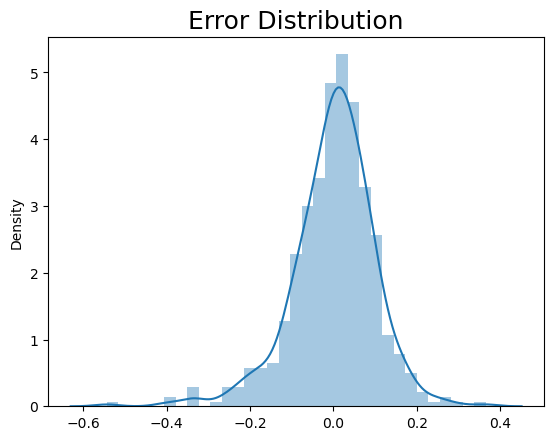

In [68]:
sns.distplot(res)
plt.title('Error Distribution', fontsize = 18)
plt.show()

#### <font color = 'red'> Inference: </font>

We can clearly see that the error terms are centred around 0 and follows a normal distribution, this is in accordance with the stated assumptions of linear regression.

### Step 8: Making Predictions Using the Final Model

In [69]:
r2_score(y_true = y_train, y_pred = y_train_predict)

0.8006014082003758

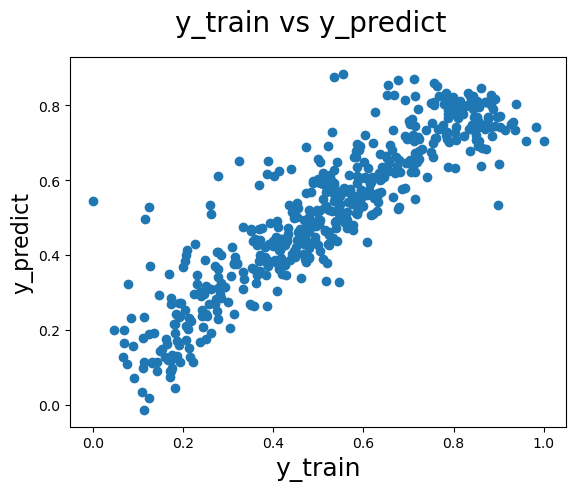

In [70]:
fig = plt.figure()
plt.scatter(y_train , y_train_predict)
fig.suptitle('y_train vs y_predict' , fontsize = 20)
plt.xlabel('y_train', fontsize = 18)
plt.ylabel('y_predict' , fontsize = 16)
plt.show()

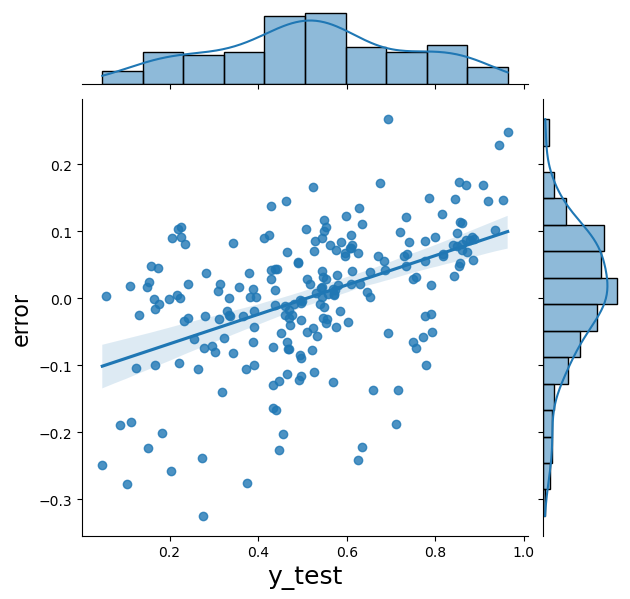

In [142]:
sns.jointplot(x=y_test,y=res_test,kind=F'reg')
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('error', fontsize=16)
plt.show()

Here we can discern that the error terms are not independent and this problem might require a higher order model

####  Applying the scaling on the test sets

In [72]:
num_vars_test = ['mnth','weekday_new','temp','atemp','hum','windspeed','cnt']

In [73]:
df_test[num_vars_test] = scaler.transform(df_test[num_vars_test])

In [74]:
df_test.describe()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,weekday_new,Spring,Summer,Winter,Mist + Cloudy,clear_partlycloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.499174,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.530303,0.254545,0.263636,0.236364,0.318182,0.654545
std,0.500809,0.311120,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.329646,0.436599,0.441609,0.425817,0.466833,0.476601
min,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.727273,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.833333,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
df_test.shape

(220, 15)

#### Dividing into X_test and y_test

In [76]:
y_test = df_test.pop('cnt')
X_test = df_test

#### Predicting with "lm" model against the test dataset 

In [77]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new_sm = sm.add_constant(X_test_new)

In [78]:
y_test_predict = lm_2.predict(X_test_new_sm)

#### Calculating the r-squared 

R-squared (R²) measures how well independent variables explain the dependent variable's variation. A high R² indicates a good fit, but it doesn't imply causation and can be misleading if overfitted.

In [79]:
print('r2_score of train dataset', r2_score(y_train, y_train_predict))
print('r2_score of test dataset', r2_score(y_test, y_test_predict))

r2_score of train dataset 0.8006014082003758
r2_score of test dataset 0.7887939163991933


In [80]:
r2_score(y_true=y_test,y_pred=y_test_predict)

0.7887939163991933

In [81]:
res_test=y_test-y_test_predict

### Step 9 : Model Evaluation
Plotting the graph for actual versus predicted values.

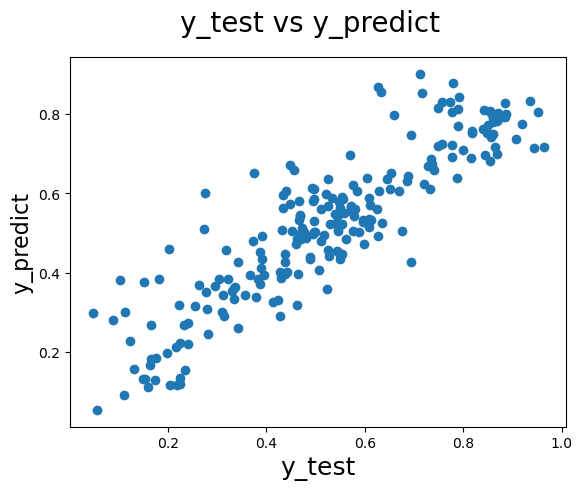

In [82]:
fig = plt.figure()
plt.scatter(y_test,y_test_predict)
fig.suptitle('y_test vs y_predict', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_predict', fontsize=16)
plt.show()

#### <font color='red'>Inference:</font> 
We can colude that the final model fit isn't by chance, and has descent predictive power.

The error distribution is homoscedastic, as seen from above plot

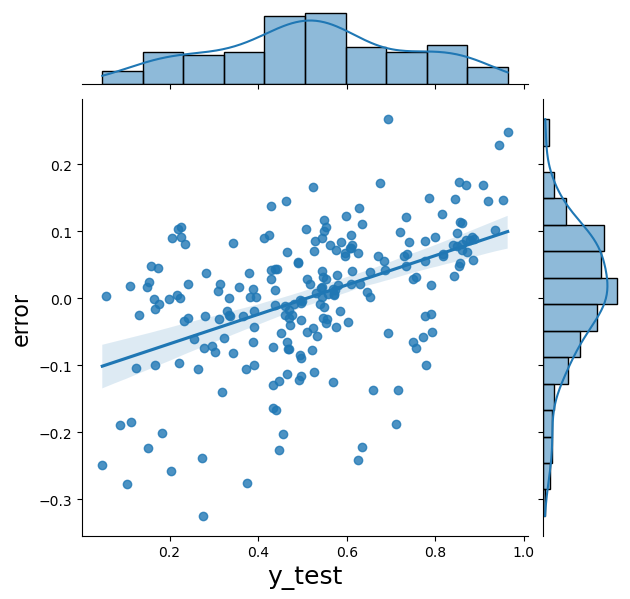

In [142]:
sns.jointplot(x=y_test,y=res_test,kind=F'reg')
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('error', fontsize=16)
plt.show()

#### Getting the variable names and the coefficient values for the final equation of the best fitted line


In [84]:
param = pd.DataFrame(lm_2.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,9))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
3,temp,0.467045
1,yr,0.237729
0,const,0.135148
8,clear_partlycloudy,0.090498
7,Winter,0.069091
6,Summer,0.043204
5,Spring,-0.077428
2,holiday,-0.081780
4,windspeed,-0.177089


### <font color = 'red'> Final Conclusions : </font>
By using the above scatter plot and the table , We can see that the equation of our best fitted line is:

cnt = 0.135 + 0.237(yr) - 0.0817(holiday) + 0.467(temp) - 0.177(windspeed) - 0.077(Spring) +                 0.043(Summer) + 0.069(Winter) + 0.091(clear _partlycloudy) 

 - From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 78% of bike demand.
- Coeffiencients of the variables explains the factors effecting the bike demand

- Based on final model top three features contributing significantly towards explaining the demand are:

 - Temperature (0.467045)
 - weathersit :(Summer + Winter + clear _partlycloudy) ~ 0.69 
 - year (0.237729)

Hence, it can be clearly concluded that the variables `temperature` , `season`/ `weather situation` and `month`  are significant in predicting the demand for shared bikes .

### <font color='red'> Final Recommendations for the Company: </font>
- With an increase in temperature the demand also increases, hence it should keep track of the weather conditions.
- During the Winter season the demand rises, hence it should be well prepared to meet the high demand.
- Holiday time seems to be least interesting bore biking, little motivation and marketing might help here.